## Mini Project: Employee Attrition Analysis and Prediction**

---

### **Introduction**
Employee attrition refers to the phenomenon of employees leaving an organization over time, either voluntarily or involuntarily. High attrition rates can significantly impact a company’s productivity, morale, and financials. The goal of this project is to analyze the factors contributing to employee attrition and build a predictive model that can identify which employees are most likely to leave the organization.

---







My main Question to Answer during this classification problem

**Will your employees leave ?**


Employee Attrition is the gradual reduction in staff numbers that occurs as employees retire or resign and are not replaced. Employee attrition can be costly for businesses. The company loses employee productivity, and employee knowledge.

“Turnover / Churn” and “Attrition” are human resource terms that are often times confused. Employee turnover and attrition both occur when an employee leaves the company. Turnover , however, is from several different actions such as discharge, termination, resignation or abandonment. Attrition occurs when an employee retires or when the employer eliminates the position. The big difference between the two is that when turnover occurs, the company seeks someone to replace the employee. But in the case of attrition, the employer leaves that vacancy unfilled or eliminates that job role . -LinkedIn

A study by the Center for American Progress found that turnover costs are often estimated to be 100% to 300% of the base salary of replaced employee, depending on wage and role of an employee.

Most business main objectives to employee churn is to try to answer the following questions:

How to reduce employee churn ?
Why are good employees leaving the company ?
Can we predict the employees most likely to leave ?


# Description: This program predicts employee attrition.




### **1. Problem Statement**


### Problem Statement:

**The goal of this project is to analyze and predict employee attrition using the IBM HR Analytics dataset. Employee attrition refers to employees leaving the organization voluntarily or involuntarily. Identifying the key factors behind attrition will help HR departments take proactive measures to retain valuable talent. This classification problem aims to predict whether an employee will leave the organization based on various features like age, job role, satisfaction levels, income, etc.**






### **2. Import Libraries**


In [7]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")



### **2.  Load the data**


In [9]:
df = pd.read_csv("Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Store the data into a dataframe and print the first 7 rows of data.



---

### **Dataset Explanation**
The dataset used is "WA_Fn-UseC_-HR-Employee-Attrition.csv" from IBM HR Analytics. It contains 1470 records with 35 features, including both numerical and categorical variables.

**Key Columns:**
- **Attrition**: Target variable (Yes/No)
- **Age, Gender, MaritalStatus, DistanceFromHome**: Demographic features
- **BusinessTravel, JobRole, Department**: Job-related categorical features
- **MonthlyIncome, DailyRate, HourlyRate**: Compensation-related
- **JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance**: Survey scores (1-4)
- **OverTime**: Whether the employee works overtime (Yes/No)
- **YearsAtCompany, YearsInCurrentRole**: Experience-related metrics

---



In [12]:

#Get the number of rows and number of columns in the data
df.shape


(1470, 35)


1470 rows and 35 columns
Their are 1470 rows of data or employees in the data set and 35 columns or data points on each employee. Get the data types of each column.


In [14]:

#Get the column data types
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   


### **4. Data Cleaning**

#### **4.1 Check for Missing Values**



Showing the columns and their data type
Get a count of the number of empty values in each column.


In [17]:

#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


Showing columns and number of missing values for each
Looks like their is no missing data since all of the columns are returning a value of 0. Let’s double check the data set for any missing values.



### No missing values found


In [20]:

#Another check for any null / missing values
df.isnull().values.any()


False


The code above returned a value = False, indicates their are no missing values
View some basic statistics about the data like the percentile, mean , maximum, minimum etc.


In [22]:

#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Sample of some statistics on the data set
Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes) the company.



#### **4.3 Remove Duplicates**



In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()



Number of duplicate rows: 0


In [26]:

#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64


A count of employee attrition
Now that we have the count, let’s get a visual of it.



Visual count of employee attrition
Show the number of employees that left and stayed at the company by age.


In [30]:

#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")


Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
_________________________________________________

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### **5. Exploratory Data Analysis (EDA)**

#### **5.1 Univariate Analysis**

Visualize distributions of single features using histograms and count plots.



### Count plot for target variable


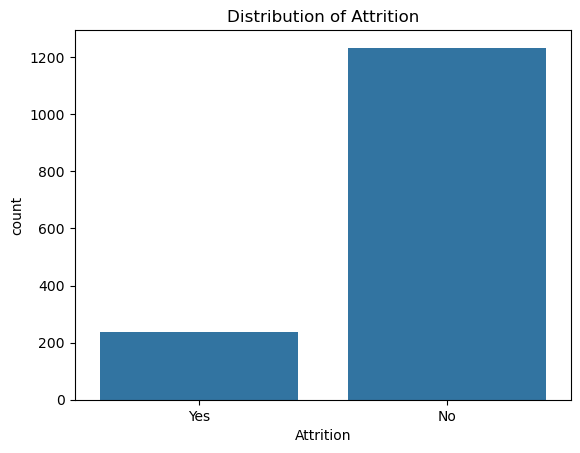

In [36]:
# Count plot for target variable
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Attrition")
plt.show()



### Count plot for Gender


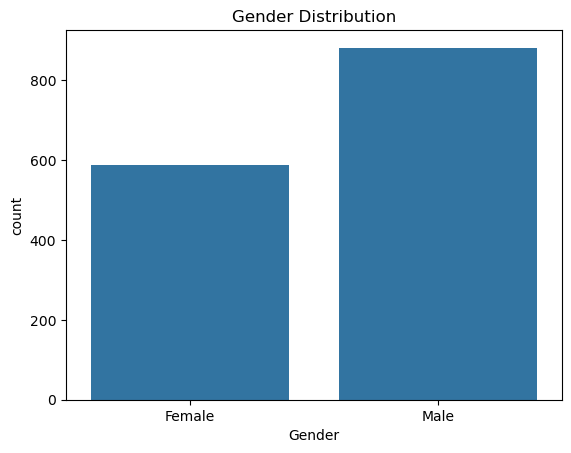

In [40]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()



### Histogram for Age


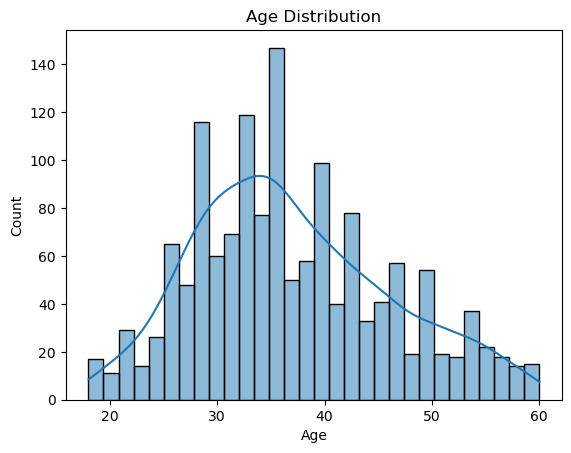

In [38]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()



### Count plot for Job Role


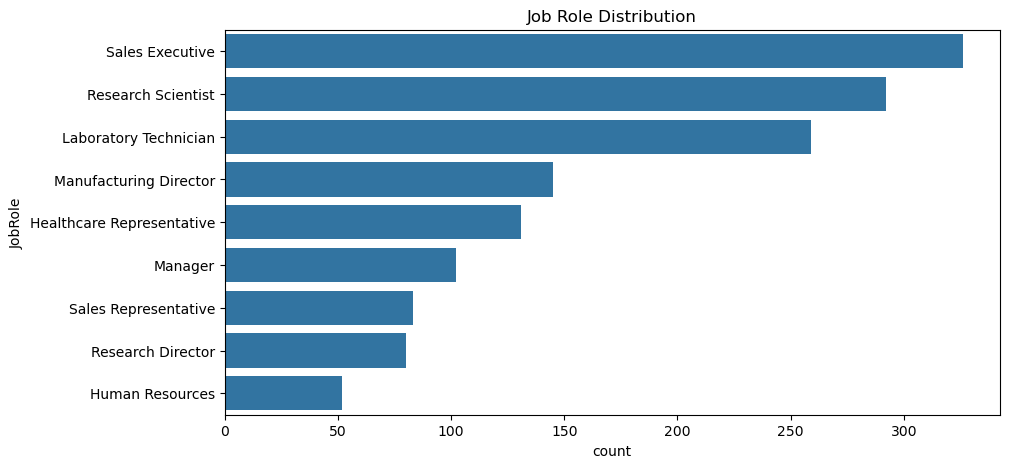

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index)
plt.title("Job Role Distribution")
plt.show()


#### **5.2 Bivariate Analysis**

Explore relationship between target and a single predictor.



Here is that you can see the age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.



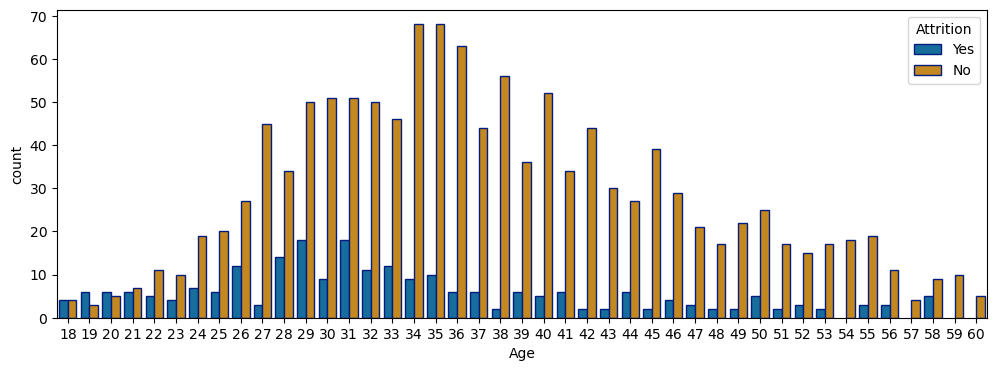

In [44]:

#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1)[0]);



### Attrition vs Gender


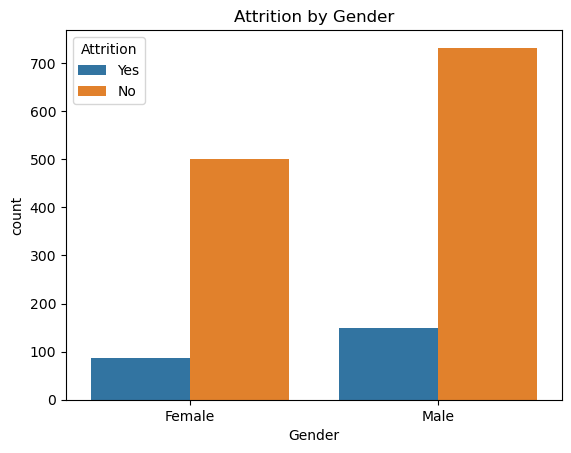

In [46]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()



### Attrition vs JobSatisfaction




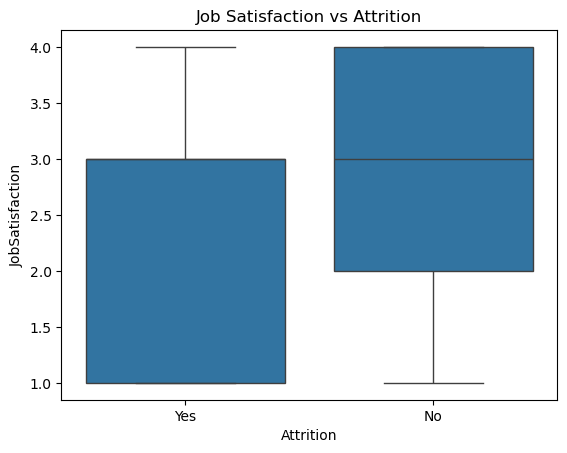

In [48]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()



### Attrition vs MonthlyIncome


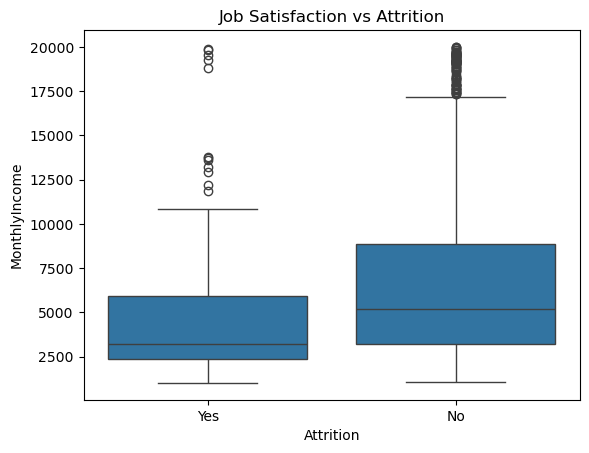

In [50]:

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()



### Attrition vs Age


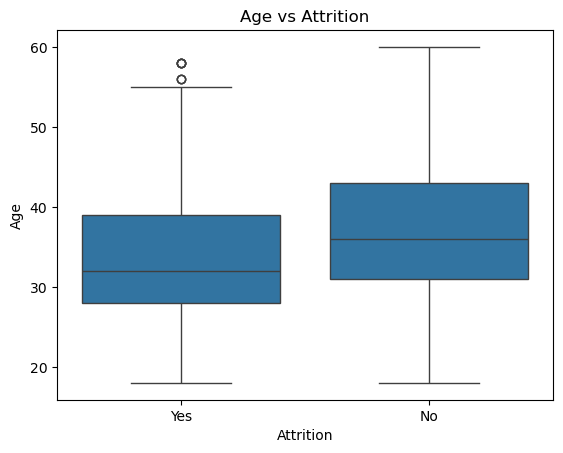

In [52]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()


#### **5.3 Multivariate Analysis**

Look at patterns across multiple features.



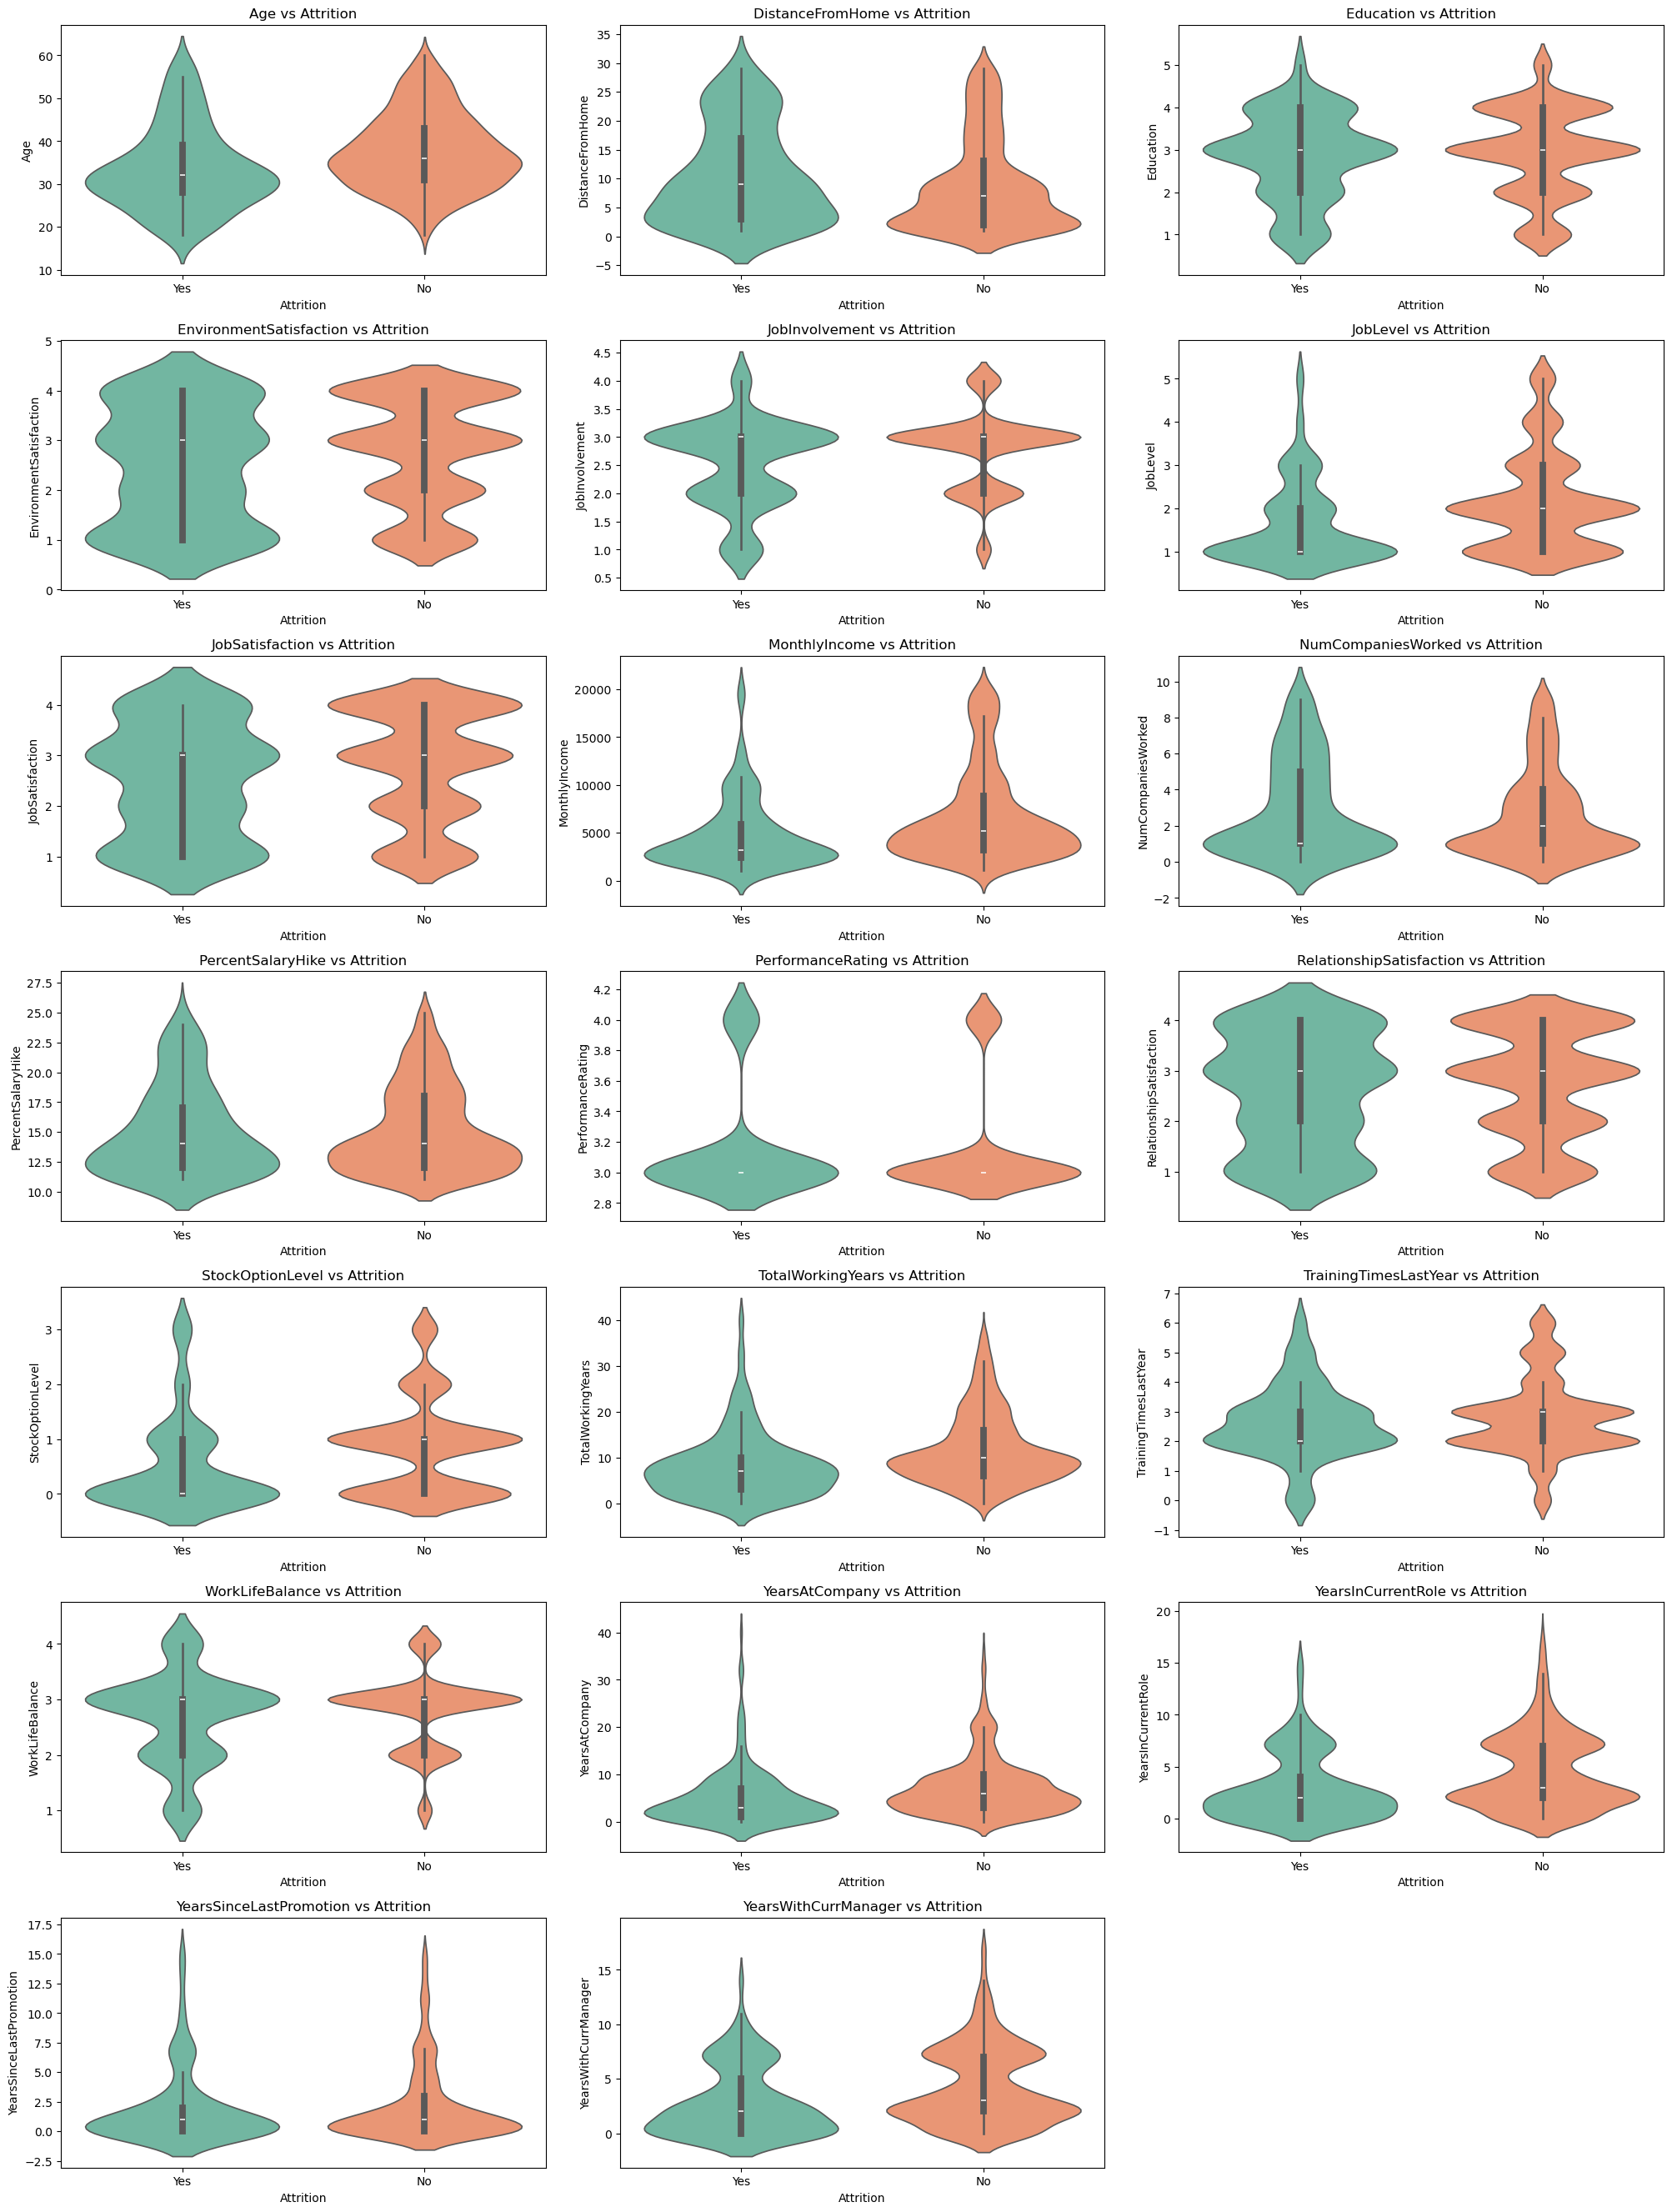

In [54]:

# List of numerical columns to plot (excluding ID-like ones)
numerical_cols = ['Age',  'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',  'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Plotting
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(8, 3, i)
    sns.violinplot(data=df, x='Attrition', y=col, palette='Set2')
    plt.title(f'{col} vs Attrition')

plt.tight_layout()
plt.show()




#### **5.4 Correlation Analysis**



In [56]:

# Convert target to numeric for correlation
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['number'])


In [57]:
# Compute correlation matrix
corr_matrix = df_corr_numeric.corr()

# Display the matrix
print(corr_matrix)

                               Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.010145  -0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571        

This is the **correlation matrix** for numeric variables in your employee attrition dataset. Each value represents the **Pearson correlation coefficient** between two variables, ranging from **-1 (perfect negative)** to **+1 (perfect positive)**. Here's a breakdown of how to interpret and extract insight from this matrix, especially regarding `Attrition`.

---

### **Key insights from the 'Attrition' column:**

You're likely most interested in what correlates with **Attrition**, so here are the top variables sorted by correlation strength with `Attrition`:

| Variable                 | Correlation with Attrition | Interpretation |
|--------------------------|----------------------------|----------------|
| **TotalWorkingYears**    | -0.171                     | Employees with more experience tend to stay. |
| **JobLevel**             | -0.169                     | Higher job level → less attrition. |
| **YearsInCurrentRole**   | -0.161                     | Longer in role → less attrition. |
| **Age**                  | -0.159                     | Older employees tend to stay. |
| **MonthlyIncome**        | -0.160                     | Higher salary → less attrition. |
| **YearsWithCurrManager** | -0.156                     | Longer manager relationship → less attrition. |
| **YearsAtCompany**       | -0.134                     | Loyalty increases with time. |
| **JobInvolvement**       | -0.130                     | More involved → less likely to leave. |
| **StockOptionLevel**     | -0.137                     | Incentivized employees stay. |
| **JobSatisfaction**      | -0.103                     | Dissatisfaction can drive attrition. |
| **EnvironmentSatisfaction** | -0.103                  | Poor work environment → more attrition. |
| **WorkLifeBalance**      | -0.064                     | Less balance → more attrition. |
| **TrainingTimesLastYear**| -0.059                     | Less training → slightly more attrition. |
| **DistanceFromHome**     | +0.078                     | Longer commute → slightly higher attrition. |

---

###  Interpretation Tips:

- **Negative values** indicate that as the variable increases, attrition tends to decrease (e.g., more experience, higher income, better satisfaction → lower attrition).
- **Positive values** (like `DistanceFromHome = 0.078`) suggest a slight increase in attrition with higher values.

---

###  Correlated Features (not necessarily with Attrition):

Some strong correlations between other features:
- `JobLevel` and `MonthlyIncome`: **0.95**
- `TotalWorkingYears` and `MonthlyIncome`: **0.77**
- `YearsAtCompany` and `YearsWithCurrManager`: **0.77**
- `YearsInCurrentRole` and `YearsAtCompany`: **0.76**

This suggests **possible multicollinearity**, which could affect some models (like Logistic Regression).

---


In [59]:
#df.corr(numeric_only=True)



Sample correlation of the columns
Let’s get a better visual of the correlation by using a heat map.


<Axes: >

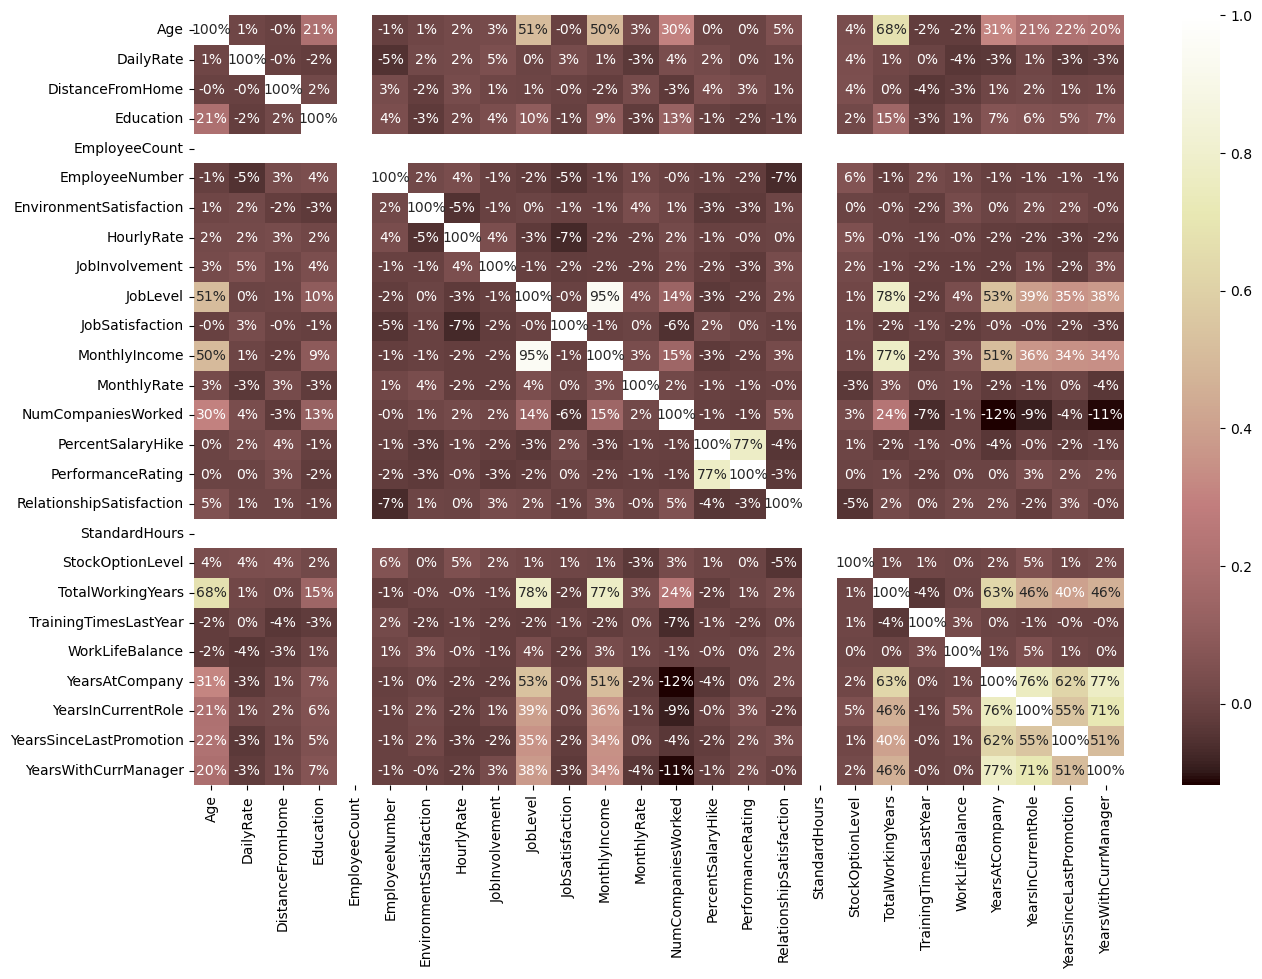

In [61]:
# Correlation heatmap
'''plt.figure(figsize=(15, 10))
sns.heatmap(df_corr_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()'''


#Visualize the correlation
plt.figure(figsize=(15,10))  #14in by 14in
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.0%',cmap='pink')



---

### **Correlation Heatmap**
**Output Observation:**
- The heatmap shows the highest correlation of `0.77` between **JobLevel** and **MonthlyIncome**, confirming that income rises with job seniority.
- **TotalWorkingYears** and **YearsAtCompany** also exhibit a strong correlation of `0.76`, indicating long-tenured employees usually have more total experience.
- **Age** and **TotalWorkingYears** show a moderately high correlation of `0.68`, as older employees are generally more experienced.
- **Attrition** has a negative correlation with **YearsAtCompany** (`-0.13`) and **JobSatisfaction** (`-0.1`), suggesting employees with low satisfaction or less tenure are more likely to leave.
- **OverTime** shows a positive correlation (`0.25`) with Attrition, implying overtime work may contribute to resignations.
- Most other features have weak correlations (< ±0.1), indicating independence.
- These observations guide feature selection—only moderately or highly correlated variables will likely affect attrition.
- The heatmap confirms that multicollinearity isn’t a major concern except for a few pairs like TotalWorkingYears and YearsAtCompany.
- These insights support the hypothesis that workload and income play roles in attrition.
- The correlation map provides a useful overview for deciding which features to explore further.

---


In [63]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **6. Feature Selection (Dropping Unnecessary Columns)**
- Drops columns like EmployeeCount, Over18, StandardHours as they have constant values.
- Output confirms fewer columns retained for model training.
- Helps eliminate irrelevant features that add no predictive power.



#### From the Heatmap we can see the columns which are contributing least to the dependent variable. So we will be dropping them.

In [66]:

#Remove unneeded columns
print(df.columns.tolist())

df.columns = df.columns.str.strip()
#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours',axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'
#Remove the column DailyRate
df = df.drop('DailyRate', axis = 1) #Contains only the value int
#Remove the column HourlyRate
df = df.drop('HourlyRate', axis = 1) #Contains only the value int
#Remove the column MonthlyRate
df = df.drop('MonthlyRate', axis = 1) #Contains only the value int
#Get the correlation of the columns.


['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']



Sample of the object data type columns in the data set, and there unique values & value count
Some columns in the data set I don’t think will be needed for training the machine learning model like the number assignment to the employee (which is just some number identification).

The StandardHours , Over18 & EmployeeCount columns contain only one value in every row, so these columns would not add any additional information to the model. We will remove these columns from the data set.


### **7. Outlier Treatment**

#### **7.1 Visualize Outliers Using Boxplots**



In [69]:

# List of numeric features to check
numeric_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 
                    'YearsAtCompany', 'YearsSinceLastPromotion', 
                    'YearsWithCurrManager', 'DistanceFromHome']





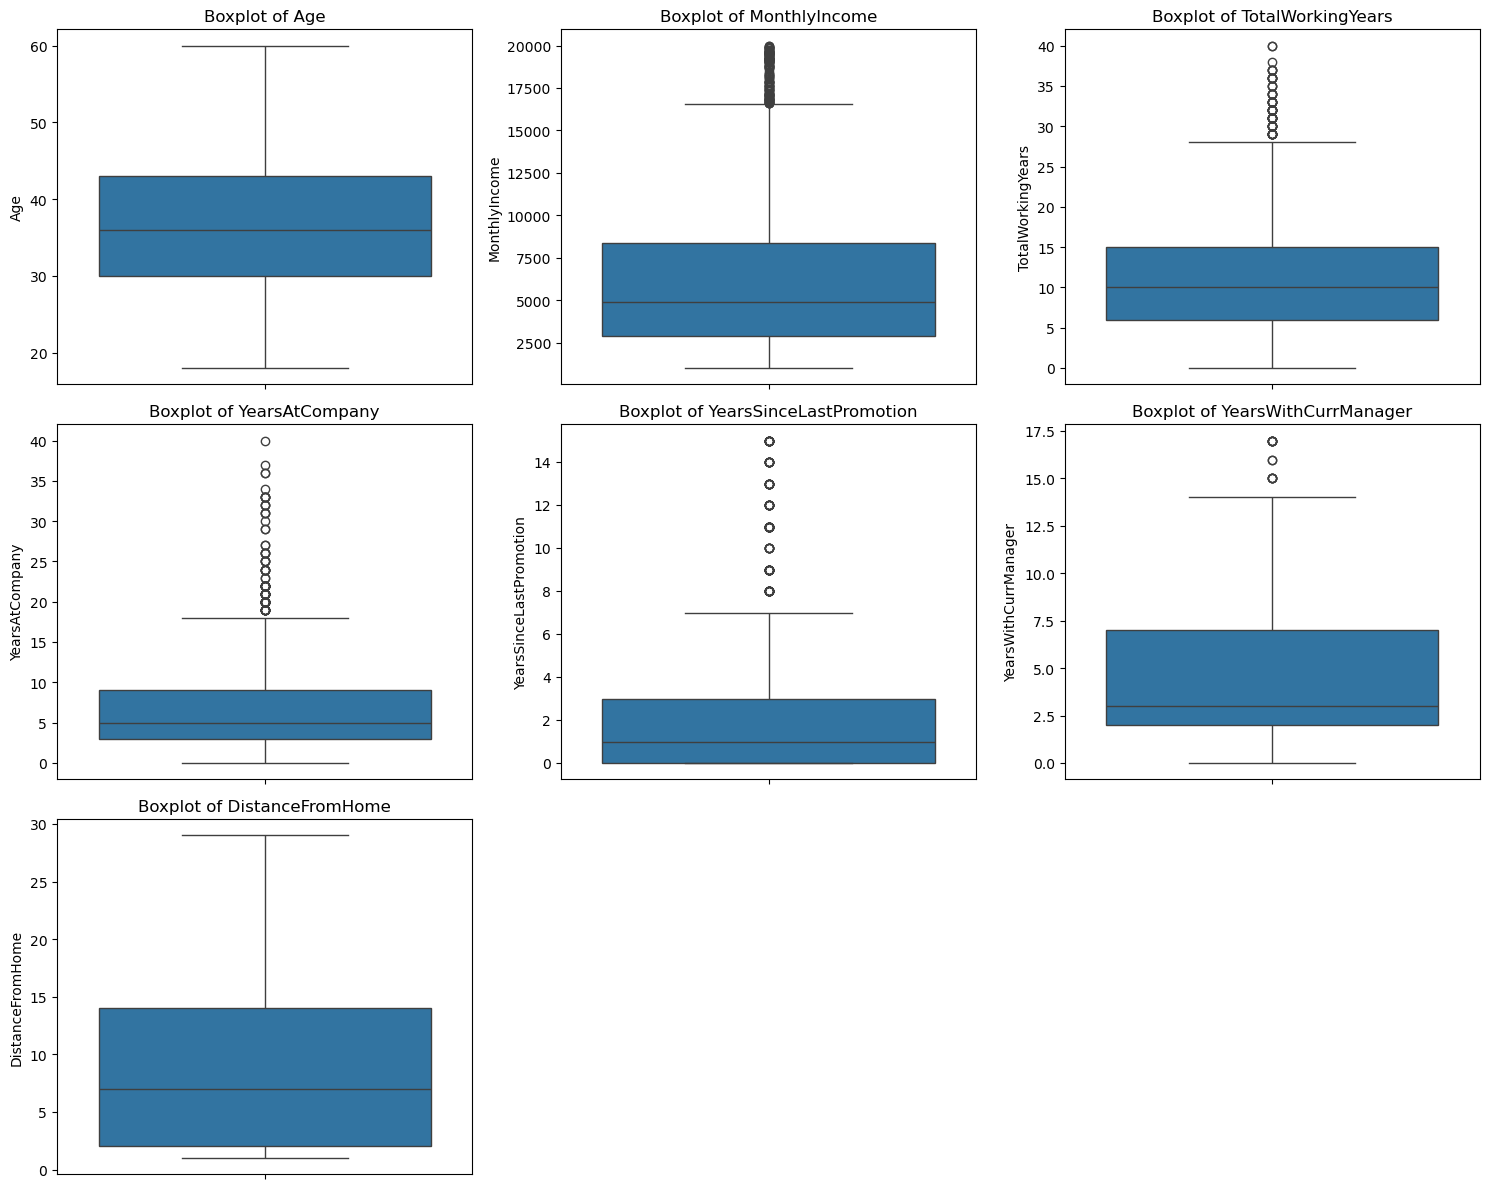

In [70]:
# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#### **7.2 Handle Outliers (Optional: IQR Method)**
Manually  to remove or cap outliers. Here's an example for `MonthlyIncome`:



In [72]:
df = df[df['YearsSinceLastPromotion'] < 7 ]


In [73]:
df = df[df['TotalWorkingYears'] < 28 ]


In [74]:
df = df[df['YearsAtCompany'] < 18 ]


In [75]:
df = df[df['MonthlyIncome'] < 16000 ]
df = df[df['YearsWithCurrManager'] < 13.0 ]



In [76]:
# Filter outlier
#df = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

In [77]:
# Checking skewness and kurtosis for numeric features
skew_kurt = df[numeric_features].agg(['skew', 'kurtosis']).T
skew_kurt.columns = ['Skewness', 'Kurtosis']
skew_kurt


,Skewness,Kurtosis
Age,0.602832,0.141510
MonthlyIncome,1.285898,1.412070
TotalWorkingYears,0.723071,0.415194
YearsAtCompany,0.769166,0.044140
YearsSinceLastPromotion,1.712359,2.484697
YearsWithCurrManager,0.840835,-0.264955
DistanceFromHome,0.929939,-0.259043


## 8. Feature engineering

****○ Label Ecoding****


****○ Encoding (for categorical)****


Now let’s prepare the data for the model. We will first transform non-numeric columns to numerical columns.


In [79]:
# Convert Attrition ('Yes'/'No') to 1/0
#df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [80]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

****Next I am going to create a new column to store the age values in. This is only to put the age values at the end of the data set. Then I will remove the column age from the front of the data set so that the target column is first.****

****Last but not least I will show the new data set.****



In [82]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df


,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,2,0,1,1,1,0,2,1,...,0,0,8,0,0,6,4,0,5,23
1,0,1,1,7,0,1,2,1,1,1,...,3,1,10,3,2,10,7,1,7,31
2,1,2,1,1,1,4,3,1,1,0,...,1,0,7,3,2,0,0,0,0,19
3,0,1,1,2,3,1,3,0,2,0,...,2,0,8,3,2,8,7,3,0,15
4,0,2,1,1,0,3,0,1,2,0,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,22,1,3,2,1,3,1,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,1,5,0,3,3,1,1,2,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,1,3,2,1,1,1,3,1,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,2,1,2,3,3,1,1,1,...,3,0,17,3,1,9,6,0,8,31


In [83]:
df.head(3)

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,2,0,1,1,1,0,2,1,...,0,0,8,0,0,6,4,0,5,23
1,0,1,1,7,0,1,2,1,1,1,...,3,1,10,3,2,10,7,1,7,31
2,1,2,1,1,1,4,3,1,1,0,...,1,0,7,3,2,0,0,0,0,19




### **9. Model Preparation**



In [85]:

x = df.drop(['Attrition'], axis = 1).values
y = df['Attrition'].values





#### **Spliting data into train and test model**


Just so you know you can look at the code here and the data here.
Now I want to split the data set into 75% training and 25% testing data sets.


In [87]:

# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

## Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **Logistic Regression**

In [92]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [93]:
log_pred = log.predict(x_test)
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [94]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [95]:
print("Training Score: ", round(log.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(log.score(x_test, y_test)*100,2), "%")

Training Score:  87.62 %
Testing Score:  86.05 %


Now get the accuracy of the model.


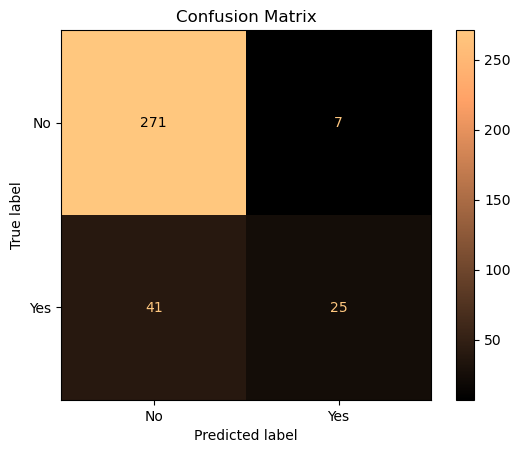

Accuracy       : 0.86
Error Rate     : 0.14
Precision (Yes): 0.78
Recall (Yes)   : 0.38
F1 Score (Yes) : 0.51


In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, log_pred , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, log_pred )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, log_pred , pos_label=1)
recall = recall_score(y_test, log_pred , pos_label=1)
f1 = f1_score(y_test, log_pred , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Decision Tree Classifier**

In [99]:


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [100]:
y_pred_dt = dt.predict(x_test)
y_pred_dt



array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [101]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [102]:
print("Training Score: ", round(dt.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dt.score(x_test, y_test)*100,2), "%")

Training Score:  100.0 %
Testing Score:  74.71 %


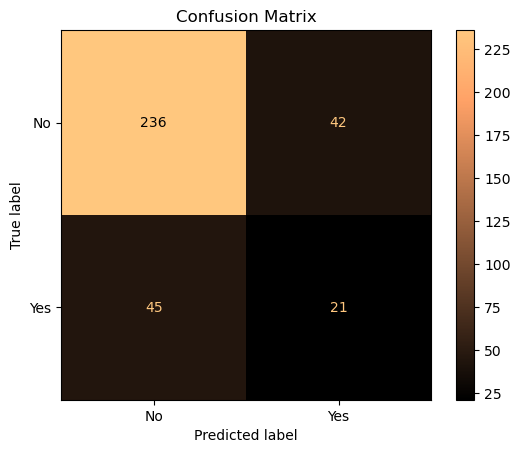

Accuracy       : 0.75
Error Rate     : 0.25
Precision (Yes): 0.33
Recall (Yes)   : 0.32
F1 Score (Yes) : 0.33


In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_dt , pos_label=1)
recall = recall_score(y_test, y_pred_dt , pos_label=1)
f1 = f1_score(y_test, y_pred_dt , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Random Forest Classifier**

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [106]:
y_pred_rf = rf.predict(x_test)
y_pred_rf



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [107]:
print("Training Score: ", round(rf.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rf.score(x_test, y_test)*100,2), "%")

Training Score:  100.0 %
Testing Score:  82.56 %


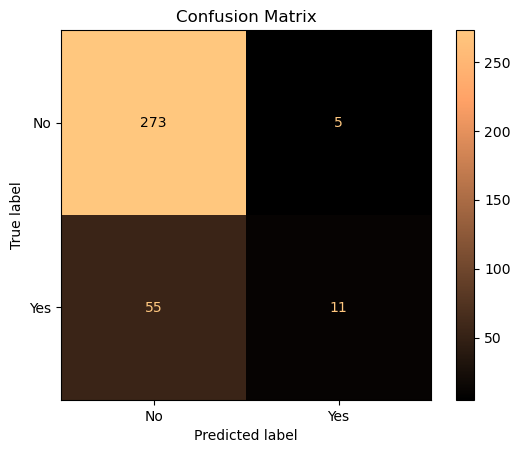

Accuracy       : 0.83
Error Rate     : 0.17
Precision (Yes): 0.69
Recall (Yes)   : 0.17
F1 Score (Yes) : 0.27


In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_rf , pos_label=1)
recall = recall_score(y_test, y_pred_rf , pos_label=1)
f1 = f1_score(y_test, y_pred_rf , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **Support Vector Machine Classifier**

In [110]:
from sklearn.svm import SVC


In [111]:
from sklearn.svm import SVC

svm = SVC()  
svm.fit(x_train, y_train)


SVC()

In [112]:

# Predict on test data
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [113]:
# Training accuracy
print("Training Score: ", round(svm.score(x_train, y_train) * 100, 2), "%")
print("Testing Score: ", round(svm.score(x_test, y_test)*100,2), "%")

Training Score:  90.12 %
Testing Score:  83.72 %


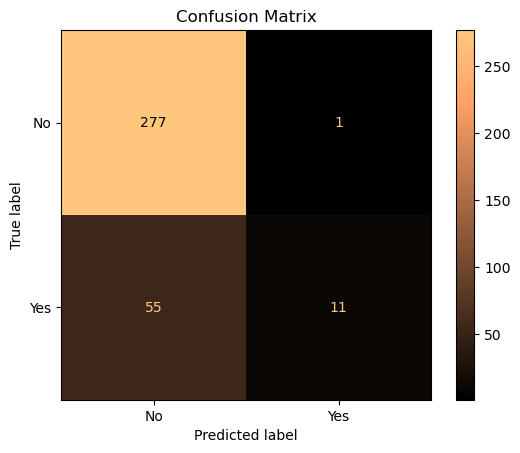

Accuracy       : 0.84
Error Rate     : 0.16
Precision (Yes): 0.92
Recall (Yes)   : 0.17
F1 Score (Yes) : 0.28


In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_svm , pos_label=1)
recall = recall_score(y_test, y_pred_svm , pos_label=1)
f1 = f1_score(y_test, y_pred_svm , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **KNeighborsClassifier**    

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [117]:
y_pred_knn = knn.predict(x_test)
y_pred_knn


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [118]:

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

Training Score:  84.62 %
Testing Score:  81.98 %


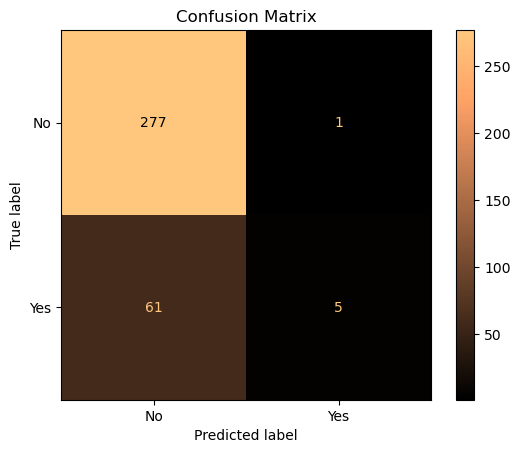

Accuracy       : 0.82
Error Rate     : 0.18
Precision (Yes): 0.83
Recall (Yes)   : 0.08
F1 Score (Yes) : 0.14


In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_knn, pos_label=1)
recall = recall_score(y_test, y_pred_knn, pos_label=1)
f1 = f1_score(y_test, y_pred_knn, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### **XGBClassifier**    

In [121]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

# Predict on train and test sets
xg_pred_train = xgb.predict(x_train)
xg_pred_test = xgb.predict(x_test)


In [123]:
print("Training Score: ", round(xgb.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(xgb.score(x_test, y_test)*100,2), "%")

Training Score:  100.0 %
Testing Score:  85.17 %


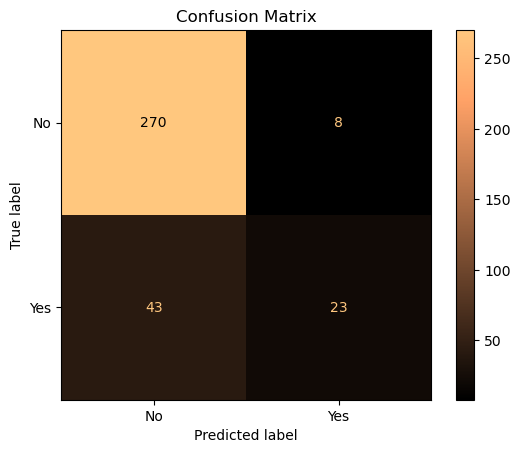

Accuracy       : 0.85
Error Rate     : 0.15
Precision (Yes): 0.74
Recall (Yes)   : 0.35
F1 Score (Yes) : 0.47


In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred_test, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='copper')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, xg_pred_test)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, xg_pred_test, pos_label=1)
recall = recall_score(y_test, xg_pred_test, pos_label=1)
f1 = f1_score(y_test, xg_pred_test, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

## **Cross Validation Scores**

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
print("\nRandom Forest Classifier: ")

print("Training:", ((cross_val_score(rf, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nDecision Tree Classifier: ")

print("Training:", ((cross_val_score(dt, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(dt, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nLogistic Regression:")

print("Training:", ((cross_val_score(log, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(log, x_test, y_test,cv=5).mean() * 100)), "%")

print("\n KNearest Neighbor Classifier: ")

print("Training:", ((cross_val_score(knn, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nSupport Vector Classifier: ")

print("Training:", ((cross_val_score(svm, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(svm, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nXGBClassifier : ")

print("Training:", ((cross_val_score(xgb, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(xgb, x_test, y_test,cv=5).mean() * 100)), "%")



Random Forest Classifier: 
Training: 86.125 %
Testing: 83.13725490196079 %

Decision Tree Classifier: 
Training: 77.0 %
Testing: 78.18840579710145 %

Logistic Regression:
Training: 86.0 %
Testing: 86.0613810741688 %

 KNearest Neighbor Classifier: 
Training: 84.00000000000001 %
Testing: 81.67945439045184 %

Support Vector Classifier: 
Training: 84.87500000000001 %
Testing: 84.5993179880648 %

XGBClassifier : 
Training: 85.125 %
Testing: 86.63682864450128 %


In [128]:
overall_scores = pd.DataFrame({'Logistic Regression': ((log.score(x_train, y_train))*100, (log.score(x_test, y_test))*100),
                              'Decision Tree Classifier' : ((dt.score(x_train, y_train))*100, (dt.score(x_test, y_test))*100),
                              'Random Forest Classifier': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                               'K Nearest Neighbor Classifier(KNN) ': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100),
                               'Support Vector Classifier(SVM) ': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                              'XGBClassifier': ((xgb.score(x_train, y_train))*100, (xgb.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Logistic Regression,87.625,86.046512
Decision Tree Classifier,100.000,74.709302
Random Forest Classifier,100.000,82.558140
K Nearest Neighbor Classifier(KNN),84.625,81.976744
Support Vector Classifier(SVM),90.125,83.720930
XGBClassifier,100.000,85.174419



---

###  **Comparison of Model Performance:**

|  Model Name               |  Training Accuracy |  Test Accuracy |  Comment |
|----------------------------|-------------------------|------------------|------------|
| **Logistic Regression**    | 87.625%                  | 86.047%           | Great balance between training and test performance. Very low overfitting. Easy to interpret. |
| **Decision Tree Classifier**| 100%                    | 74.71%           | Perfect accuracy on training, but poor on test data. Classic sign of **overfitting**. Needs pruning or regularization. |
| **Random Forest Classifier**| 100%                    | 82.558%           | Again, perfect on training but drops on test. Better than decision tree, but still **overfits**. Can be tuned to improve.  |
| **K Nearest Neighbors (KNN)**| 84.62%                | 81.97%           | Lower training score but good test performance. **Less overfitting**. Simple and effective. |
| **Support Vector Machine (SVM)**| 90.125%            | 83.72%           | Performs well on both training and test. Good generalization. Might take time to train on large data.  |
| **XGBoost Classifier**      | 100%                    | 85.17%           | Very strong model, but again shows **slight overfitting**. Needs fine-tuning (like max_depth or learning rate).  |

---

###  **What is Overfitting?**

Overfitting happens when a model learns the training data too well—including its noise and outliers—so it fails to perform well on new, unseen data.

- **Perfect training score** + **much lower test score** = Overfitting
- **Similar training and test scores** = Good generalization

---

###  **In Brief**

- **Best Balanced Model**: Logistic Regression and SVM. They generalize well and are reliable.
- **Strong but Needs Tuning**: XGBoost and Random Forest (Maybe with regularization and hyperparameter tuning they will perform better).
- **Avoid As-Is**: Decision Tree without pruning (very high risk of overfitting).
- **Good Simple Model**: KNN if scaled properly and tuned (sensitive to distance and features).

---


###  **Conclusion**:

The project successfully built and compared multiple models to predict employee attrition. Based on performance and interpretability, **Logistic Regression** is the recommended model. However, for more advanced and potentially higher-performing solutions, **SVM or tuned XGBoost** can also be considered. Proper feature engineering and tuning are key to further improvement.




### **Let’s see what the models thinks are the important features.**


In [131]:


# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rf.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.106
Age_Years,0.076
DistanceFromHome,0.060
TotalWorkingYears,0.059
YearsAtCompany,0.048
YearsWithCurrManager,0.046
PercentSalaryHike,0.046
OverTime,0.042
JobSatisfaction,0.037



#### Sample of important features
#### Their are a lot of features to look at, maybe it is best to see a visualization of the data.


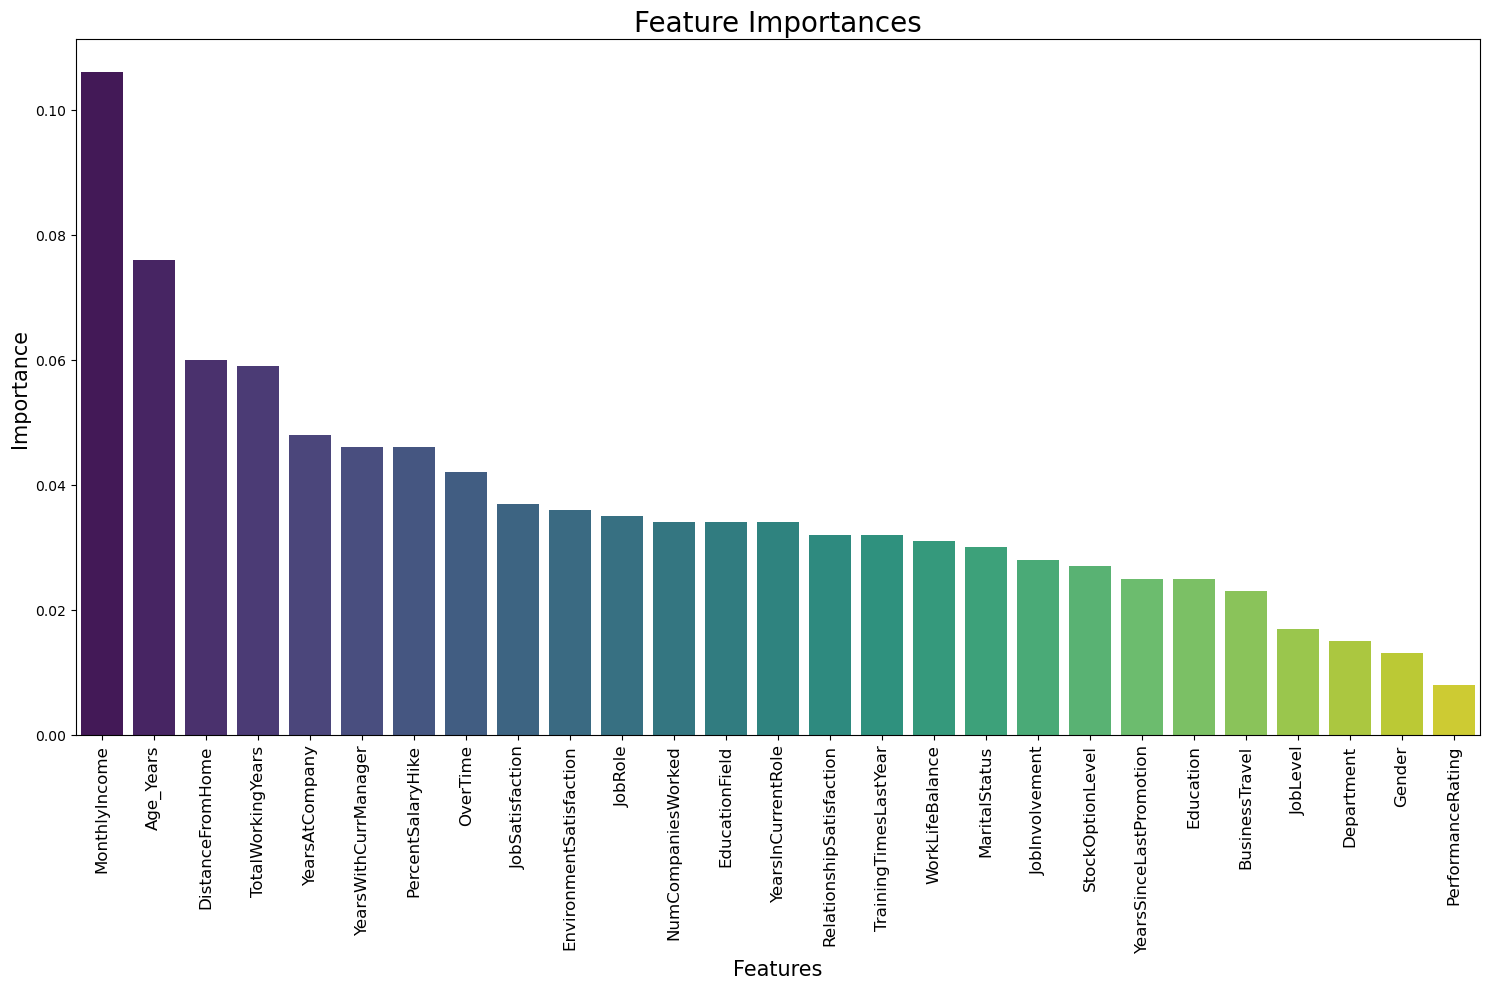

In [133]:

# Assuming importances DataFrame is already created
importances = importances.sort_values('importance', ascending=False)

# Set the figure size for better visibility
plt.figure(figsize=(15, 10))

# Create the barplot
sns.barplot(x=importances.index, y=importances['importance'], palette='viridis')

# Add titles and labels
plt.title("Feature Importances", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Importance", fontsize=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Monthly income appears to be the most important feature followed by the persons age, daily rate, and monthly rate. Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.




### **Top Features Influencing Attrition:**


| Rank | Feature                  | Importance | Observation                                                                                   |
| ---- | ------------------------ | ---------- | --------------------------------------------------------------------------------------------- |
| 1️⃣  | **MonthlyIncome**        | 0.106      | Employees with lower income may feel undervalued or underpaid, leading to higher attrition.   |
| 2️⃣  | **Age\_Years**           | 0.076      | Younger employees may be more likely to leave due to better opportunities or less attachment. |
| 3️⃣  | **DistanceFromHome**     | 0.060      | Long commutes can cause fatigue and reduce work-life balance, increasing attrition risk.      |
| 4️⃣  | **TotalWorkingYears**    | 0.059      | Experienced employees may have more job options, increasing the chance of leaving.            |
| 5️⃣  | **YearsAtCompany**       | 0.048      | Shorter tenure may indicate lack of loyalty or engagement.                                    |
| 6️⃣  | **YearsWithCurrManager** | 0.046      | Frequent manager changes or weak relationships can influence employee retention.              |
| 7️⃣  | **PercentSalaryHike**    | 0.046      | Perceived fairness in compensation changes can affect satisfaction and retention.             |
| 8️⃣  | **OverTime**             | 0.042      | Consistent overtime increases stress and dissatisfaction, contributing to attrition.          |


---

###  **Moderately Important Features:**

- **EnvironmentSatisfaction**, **JobSatisfaction**, and **WorkLifeBalance**: Show that employee experience and quality of work life play key roles in retention.
- **PercentSalaryHike** and **YearsWithCurrManager**: Growth opportunities and good leadership positively influence retention.

---

###  **Less Impactful Features:**

- **Gender**, **Department**, and **PerformanceRating** showed minimal influence.
- These may not directly relate to attrition or could be indirectly captured by stronger features.

---

###  **Observation:**

- **Compensation (MonthlyIncome, SalaryHike)** and **working conditions (OverTime, DistanceFromHome, JobSatisfaction)** are the strongest drivers of attrition.
- **Younger employees or those with fewer years at the company** are more likely to leave.
- Focusing HR efforts on **employee satisfaction, fair compensation, and work-life balance** can help reduce attrition.




###  **Conclusion on Employee Attrition**

---

###  **What Drives Employee Attrition?**

My analysis reveals that **employee attrition is influenced by a combination of compensation, work-life balance, job satisfaction, and career growth opportunities**. Here are the key insights:

---

###  **Top Reasons for Employees Leaving:**

|  **Factor**               |  **Impact Explanation** |
|----------------------------|---------------------------|
| **Low Monthly Income**     | Employees with lower salaries are more likely to feel undervalued and seek better-paying jobs. |
| **Frequent Overtime**      | Excessive overtime leads to stress and burnout, pushing employees to quit. |
| **Young Age**              | Younger employees often seek rapid career growth and may switch jobs more frequently. |
| **Long Commute (DistanceFromHome)** | Long travel distances reduce work-life balance, leading to dissatisfaction. |
| **Low Job & Environment Satisfaction** | Poor experiences at work directly impact motivation and increase attrition risk. |
| **Few Years at Company**   | Employees in their early tenure are more likely to leave if they don’t feel connected or rewarded. |
| **Lack of Career Growth (Few Promotions, Stagnant Role)** | Employees who feel stuck are more likely to quit for growth elsewhere. |

---

###  **Summary:**

- Attrition is **not random**—it's largely **predictable** using job-related and personal satisfaction factors.
- Companies can reduce attrition by:
  - Offering **competitive salaries**
  - **Monitoring overtime**
  - Supporting **career development**
  - Improving **job satisfaction and workplace environment**

---

###  **Business Recommendation:**

> To retain valuable talent, HR teams should focus on improving compensation fairness, ensuring work-life balance, and fostering career growth through mentorship, promotions, and role variety.




| Model               | Accuracy | Error Rate | Precision (Yes) | Recall (Yes) | F1 Score (Yes) |
| ------------------- | -------- | ---------- | --------------- | ------------ | -------------- |
| XGBoost             | 0.85     | 0.15       | 0.74            | 0.35         | 0.47           |
| KNN                 | 0.82     | 0.18       | 0.83            | 0.08         | 0.14           |
| SVM                 | 0.84     | 0.16       | 0.92            | 0.17         | 0.28           |
| Random Forest       | 0.83     | 0.17       | 0.69            | 0.17         | 0.27           |
| Decision Tree       | 0.75     | 0.25       | 0.33            | 0.32         | 0.33           |
| Logistic Regression | 0.86     | 0.14       | 0.78            | 0.38         | 0.51           |

